# Salary Prediction 

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('Salaries.csv')
print(df)

         rank discipline  yrs.since.phd  yrs.service   sex  salary
0        Prof          B             19           18  Male  139750
1        Prof          B             20           16  Male  173200
2    AsstProf          B              4            3  Male   79750
3        Prof          B             45           39  Male  115000
4        Prof          B             40           41  Male  141500
..        ...        ...            ...          ...   ...     ...
392      Prof          A             33           30  Male  103106
393      Prof          A             31           19  Male  150564
394      Prof          A             42           25  Male  101738
395      Prof          A             25           15  Male   95329
396  AsstProf          A              8            4  Male   81035

[397 rows x 6 columns]


In [4]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [5]:
df['rank'].replace(['Prof', 'AsstProf '],
                        [0, 1], inplace=True)

# check Null Value is present or Not

In [6]:
df.isnull()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
392,False,False,False,False,False,False
393,False,False,False,False,False,False
394,False,False,False,False,False,False
395,False,False,False,False,False,False


In [7]:
df.isnull().any()

rank             False
discipline       False
yrs.since.phd    False
yrs.service      False
sex              False
salary           False
dtype: bool

In [8]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [10]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


means there is not any null value in our Dataset

# Visualize Data

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split


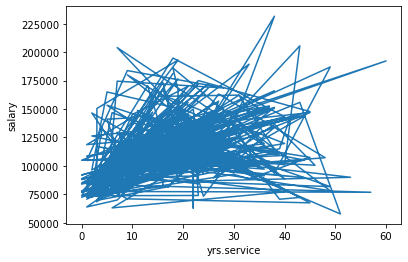

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

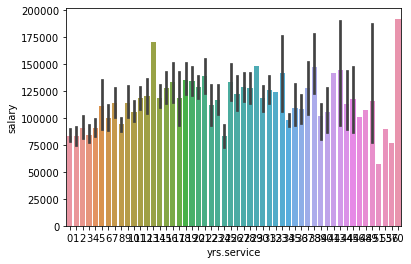

In [12]:
plt.plot(df["yrs.service"],df["salary"])
plt.xlabel("yrs.service")
plt.ylabel("salary")
plt.show()

sns.barplot(x="yrs.service",y="salary",data=df)

In [13]:
 # replacing values
df['rank'].replace(['Prof', 'AsstProf','AssocProf'],
                        [0, 1,2],inplace=True)


In [14]:
df['discipline'].replace(['B','A'],[0,1],inplace=True)

In [15]:
df['sex'].replace(['Male','Female'],[0,1],inplace=True)

Prepare Data

In [16]:
X= df.drop('salary',axis=1)
y= df['salary']

In [17]:
X.shape , y.shape

((397, 5), (397,))

Split Data into train and test

In [18]:
#splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1) 
X_train.shape , X_test.shape ,y_train.shape , y_test.shape

((277, 5), (120, 5), (277,), (120,))

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score , mean_squared_error

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Test Model

In [21]:
pred = lr.predict(X_test)
pred

array([ 95009.68816842,  91860.62444658, 126052.16979568,  83678.24584406,
       130386.7407594 , 127415.24311495, 126375.782146  , 100732.28695544,
       131412.98074287,  75703.70433154, 115392.23708776,  91832.31877009,
       130170.99919252, 125473.56901298, 134884.58543906,  94030.72226865,
        86271.92232301, 136888.59720499,  99375.37714884, 109969.0884766 ,
       127333.39821151, 119919.33607857, 125797.18136331, 122273.10881616,
       102320.97165461, 125774.09056482, 133887.72250806, 120629.02118451,
       140954.95875088, 125581.43979642, 119403.19570116, 134953.20935702,
       100153.68617275, 109321.86377594,  89585.46818127, 124008.91116426,
       136581.14092167, 101055.89930577, 129945.38781262,  69002.13964474,
        89125.67937102, 116441.56786971, 118608.85335158, 128922.08291068,
       120884.00961688,  90379.81053086, 110802.67769166, 136473.27013822,
       125852.58429579, 141062.82953432, 126189.41763159, 125142.89918985,
       132207.32309245,  

In [22]:
y_test

174    105000
359     78785
250    109000
274     78500
283    155865
        ...  
382     86895
39     100938
171    151575
271    194800
247    101100
Name: salary, Length: 120, dtype: int64

Evaluate

In [23]:
lr.score(X_test , y_test)

0.3175095677056937

In [24]:
rmse =np.sqrt(mean_squared_error(y_test,pred))
r2 = r2_score(y_test,pred)

In [25]:
rmse , r2

(25043.21508207943, 0.337591917812746)